# Oscillating droplet verification case


To analyze the accuracy of LENT with interface deformation we adopt the setup of an oscillating droplet given in [14, 17]. For this case, Lamb derived an analytical solution. The oscillation frequency of an inviscid droplet is given by $$\omega^2_n = \frac{n(n+1)(n-1)(n+2)\sigma}{[(n+1)\rho_d+n\rho_a]\mathit{R}^3_0}$$ with the mode number $n$, the droplet density $\rho_d$, the density of the ambient ﬂuid $\rho_a$ and the radius of the unperturbed droplet $\mathit{R}_0$. In case of a viscous ﬂuid, the amplitude $a_n(t)$ decreases over time $$a_n(t)=a_0e^{-\gamma t},\ \gamma = \frac{(n-1)(2n+1)\nu}{\mathit{R}^2_0}.$$ 

The initial interface shape is $$\mathit{R}(\theta,t) = \mathit{R}_0 + \epsilon\mathit{P}_n(\cos\theta)\sin(\omega_nt),\ \ \theta \in [0,2\pi],$$where $\mathit{P}_n$ denotes the $n$-th order Legendre polynom.

The domain is $\omega$ : $[0,0,0]\times[4,4,4]$, the interface is initialized with $\mathit{R}_0 = 1$, $n = 2$, $\epsilon = 0.025$ and $t = \pi/(2\omega_n)$ with its center at $[2.00001,1.99999,2.0000341]$. Material parameters are $\rho_d = 10$, $\rho_a = 0.1$, $\nu_d = [0.05,0.005]$, $\nu_a = 5e-4$ and $\sigma = 10$. Initial ﬁelds at $t = 0 $ are $\mathbf{v}_0 = 0$ and $p_0 = 0$. Dirichlet boundary conditions are used for the pressure $(p = 0)$ and $\nabla\mathbf{v}\bullet n = 0$ for $\mathbf{v}$. The semi-axis length is computed as $$s_x = \frac{\max \limits_{k}\left(\mathbf{x}^k_\Gamma\cdot\mathbf{e}_x\right)-\min \limits_{k}\left(\mathbf{x}^k_\Gamma\cdot\mathbf{e}_x\right)}{2}$$ in each time step.

**SAAMPLE: A Segregated Accuracy-driven Algorithm for Multiphase Pressure-Linked Equations,
Tobias Tolle, Dieter Bothe, Tomislav Maric** __[arXiv](https://arxiv.org/abs/2001.09775v1)__

In [33]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt

rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200

import os
if (not(os.path.exists('figures'))):
    os.mkdir('figures')

def plot_shinJuric2011(case_path):
    
    study_name_shinJuric2011 = "shinJuric2011.parameter"
    case_0_name_shinJuric2011 = case_path + study_name_shinJuric2011 + "_00000_template_copy_block"
    df_shinJuric2011 = datglom.data_agglomerator(study_name_shinJuric2011,case_0_name_shinJuric2011,"oscillatingDropletResults.csv").study_dataframe()
    df = df_shinJuric2011.reset_index()
    nu_d=list(set(df['nu_droplet']))
    resolutions=list(set(df['resolution']))
    
    R_0=1
    n=2
    sigma=10
    rho_d = 10
    rho_a = 0.1
    a_0 = 0.025
    w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a))*R_0**3)
    #print(w_n)

    fig, ax = plt.subplots(1,2)
    
    for i,nu in enumerate(nu_d, start=0):
        gamma = (n-1)*(2*n+1)*nu/(R_0**2)
        df_nu = df.loc[df['nu_droplet']==nu]
        max_t = max(df_nu['time'])
        
        for resolution in resolutions:
            s_x = df.loc[(df['nu_droplet']==nu)&(df['resolution']==resolution) ]
            ax[i].plot(s_x['time']* w_n / 20*np.pi,s_x['semi-axes-x'],label = "%s"%resolution)
            ax[i].legend(loc='upper left')
            if max(s_x['time']) == max_t:
                ax[i].plot(s_x['time']* w_n / 20*np.pi, R_0 + a_0*np.exp(-gamma*s_x['time']),'k--')
                ax[i].plot(s_x['time']* w_n / 20*np.pi, R_0 - a_0*np.exp(-gamma*s_x['time']),'k--')
                
        ax[i].set_xlabel("$t^*$")
        ax[i].set_ylabel('$s_x$')
        ax[i].set_xlim(0,2.2)
        ax[i].set_ylim(0.97,1.03)
        ax[i].set_xticks([0,0.5,1,1.5,2])
        ax[i].set_xticklabels(['0','1/2','1','3/2','2'])
        ax[i].set_title(r"$\nu = %s,\ %s$"%(nu,study_name_shinJuric2011))
        ax[i].grid(c='gainsboro')
    
    #fig.suptitle(r'%s'%case_path,y=1.02,fontsize=12)
    fig.tight_layout()      
    #fig.subplots_adjust(top=0.88)
    
#-------------------------------------unsave/save figures------------------------------------------
#     split_n= case_path.split('/')
#     fig_name= "Osci_shinJuric2011"+"_"+split_n[0]+'_'+split_n[1]+'_'+split_n[2]
#     figures_path = os.environ['LENT_DENSITY_RATIO']
#     plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#     plt.savefig('figures/%s.pdf'% fig_name)
    
    plt.show()

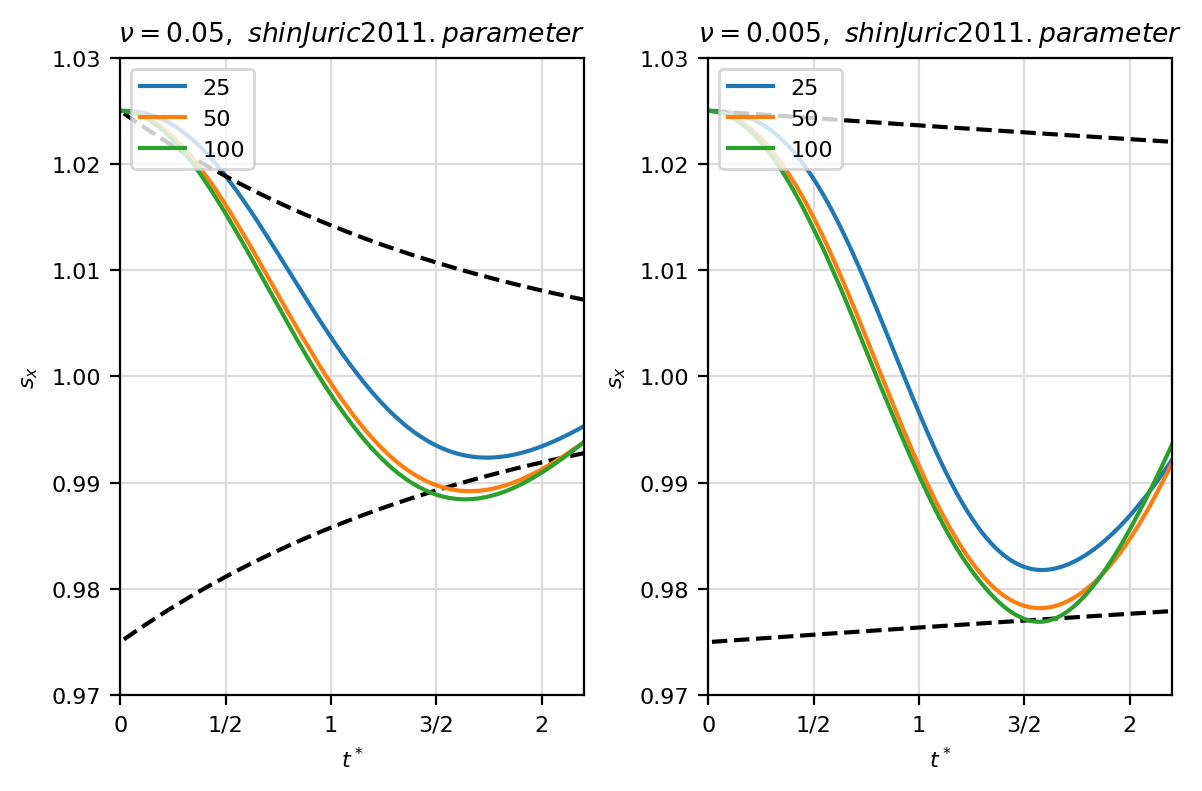

In [34]:
rcParams["figure.dpi"] = 200
rcParams["font.size"] = 8
plot_shinJuric2011("rhoLent_shinJuric2011/rhoRatio_1000/")

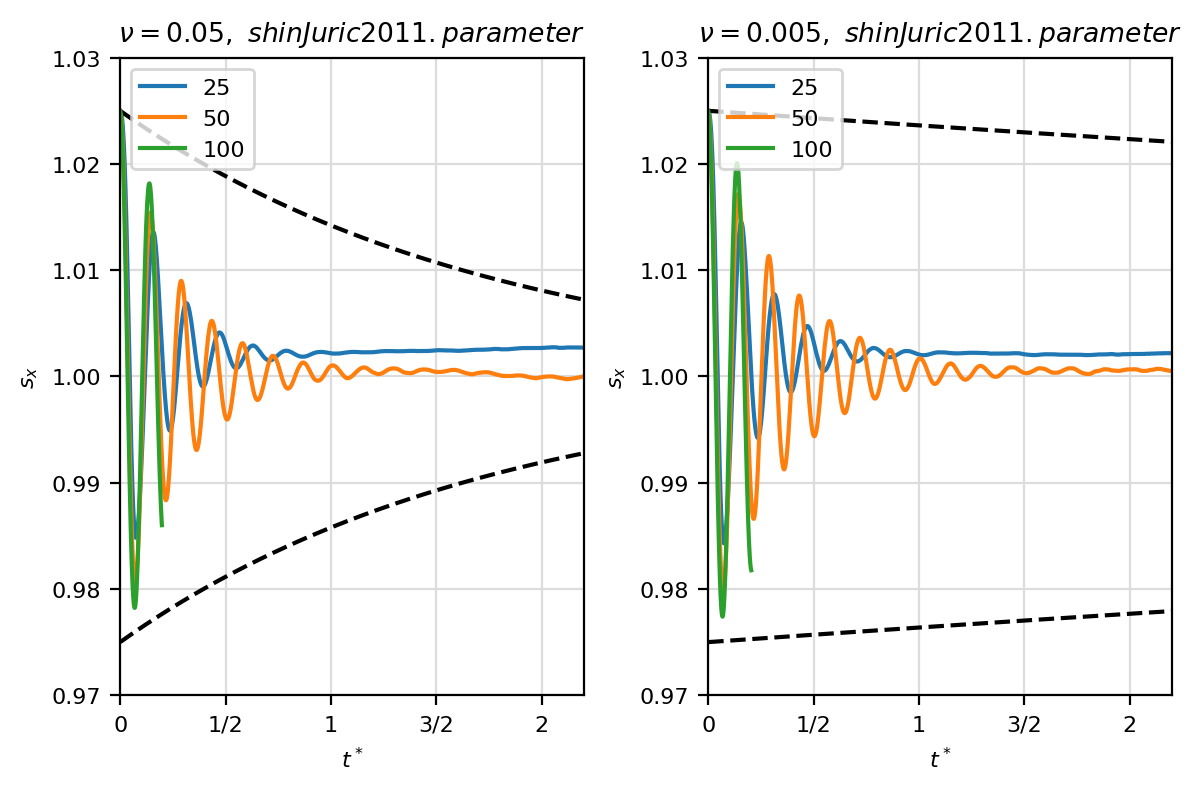

In [6]:
rcParams["figure.dpi"] = 200
rcParams["font.size"] = 8
plot_shinJuric2011("lent_shinJuric2011/rhoRatio_1/")

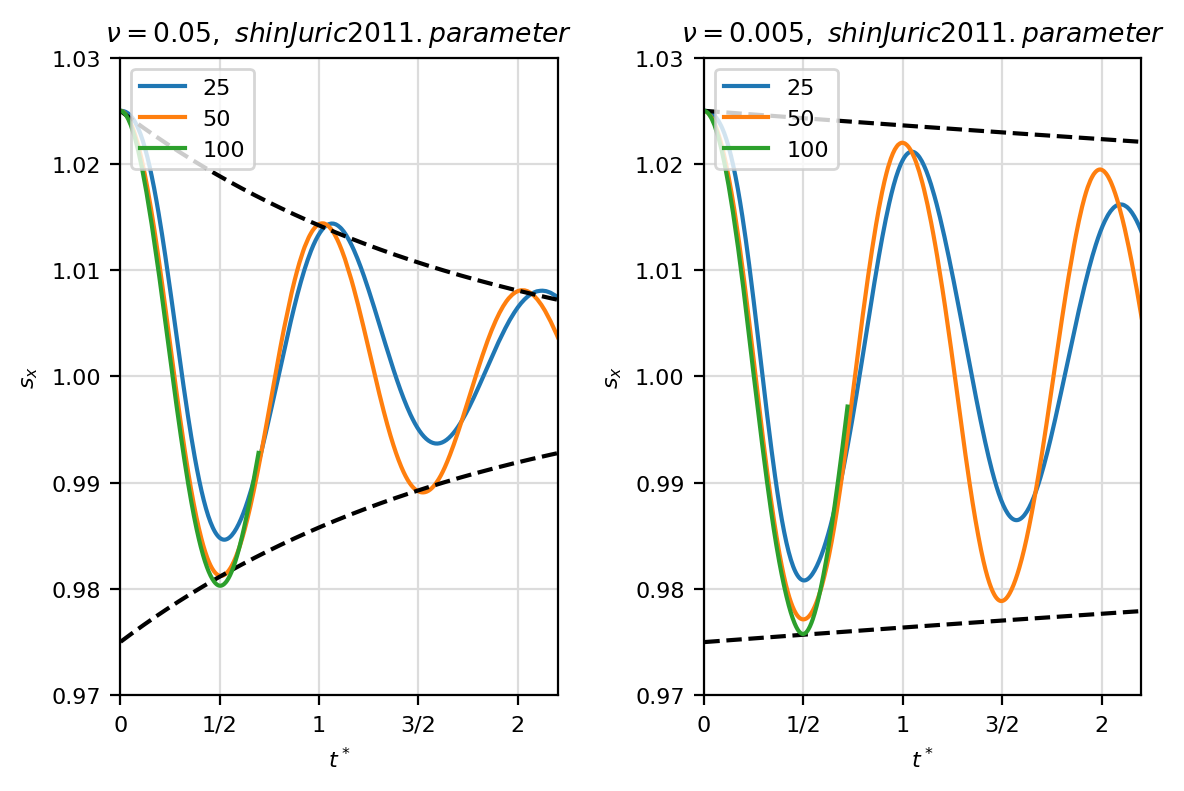

In [2]:
rcParams["figure.dpi"] = 200
rcParams["font.size"] = 8
plot_shinJuric2011("withRhoEquation/withMomentumPredictor/limitedLinearV1/")

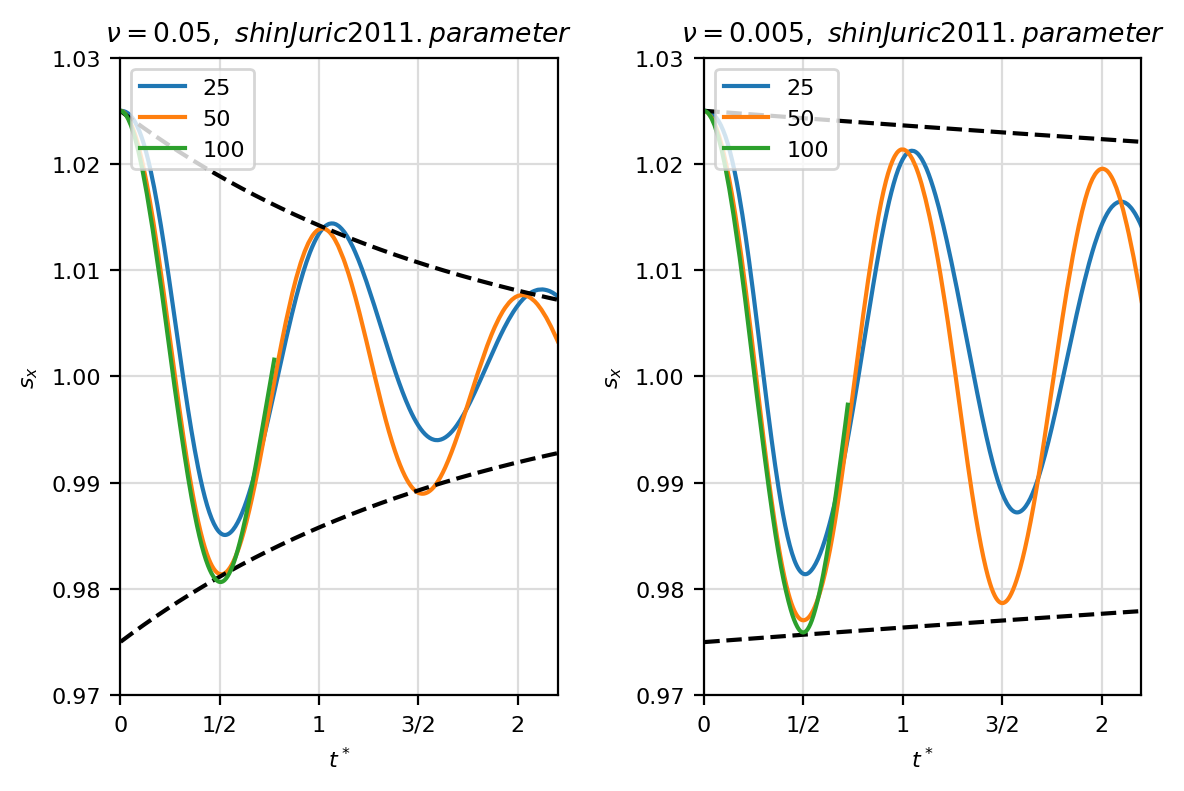

In [4]:
plot_shinJuric2011("noRhoEquation/withMomentumPredictor/limitedLinearV1/")

## shinJuric2011_mercuryAir

In [137]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt

rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200

import os
if (not(os.path.exists('figures'))):
    os.mkdir('figures')

def plot_shinJuric2011_mercuryAir(case_path, prefix):
    
    study_name_shinJuric2011 = "shinJuric2011_mercuryAir.parameter"
    case_0_name_shinJuric2011 = case_path + prefix + study_name_shinJuric2011 + "_00000_template_copy_block"
    df_shinJuric2011 = datglom.data_agglomerator(study_name_shinJuric2011,case_0_name_shinJuric2011,"oscillatingDropletResults.csv").study_dataframe()
    df = df_shinJuric2011.reset_index()
    #nu_d=list(set(df['nu_droplet']))
    resolutions=list(set(df['resolution']))
    
    R_0=0.01
    n=2
    sigma=0.4855
    rho_d = 1.35336e+04
    rho_a = 1.1839
    nu = 1.133e-07
    a_0 = 0.00025
    w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a)*R_0**3))
    print(w_n)
    print(6*np.pi / w_n)

#    fig, ax = plt.subplots(1,2)
    
    gamma = (n-1)*(2*n+1)*nu/(R_0**2)
#    df_nu = df.loc[df['nu_droplet']==nu]
    max_t = max(df['time'])
    
    #plt.figure(figsize = (4,5))
            
    for resolution in resolutions:
        s_x = df.loc[(df['resolution']==resolution)]
        plt.plot(s_x['time']* w_n / 20*np.pi,s_x['semi-axes-x'],label = "%s"%resolution)
        plt.legend(loc='upper left')
        if max(s_x['time']) == max_t:
            plt.plot(s_x['time']* w_n / 20*np.pi, R_0 + a_0*np.exp(-gamma*s_x['time']),'k--')
            plt.plot(s_x['time']* w_n / 20*np.pi, R_0 - a_0*np.exp(-gamma*s_x['time']),'k--')
                
    plt.xlabel("$t^*$")
    plt.ylabel('$s_x$')
#    plt.xlim(0,2.2)
#    plt.ylim(0.0097,0.0103)
#    plt.xticks([0,0.5,1,1.5,2],['0','1/2','1','3/2','2'])
    #plt.xticklabels()
    plt.title(prefix+"shinJuric2011_mercuryAir.parameter")
    plt.grid(c='gainsboro')
               
    #plt.gca().set_aspect(0.5)
    
    #fig.suptitle(r'%s'%case_path,y=1.02,fontsize=12)
    plt.tight_layout()      
    #fig.subplots_adjust(top=0.88)
    
#-------------------------------------unsave/save figures------------------------------------------
#     split_n= case_path.split('/')
#     fig_name= "Osci_shinJuric2011"+"_"+split_n[0]+'_'+split_n[1]+'_'+split_n[2]
#     figures_path = os.environ['LENT_DENSITY_RATIO']
#     plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#     plt.savefig('figures/%s.pdf'% fig_name)
#    axes=plt.gca()
#    axes.set_aspect('equal')
    
    plt.show()

16.940268089793104
1.1127070611648728


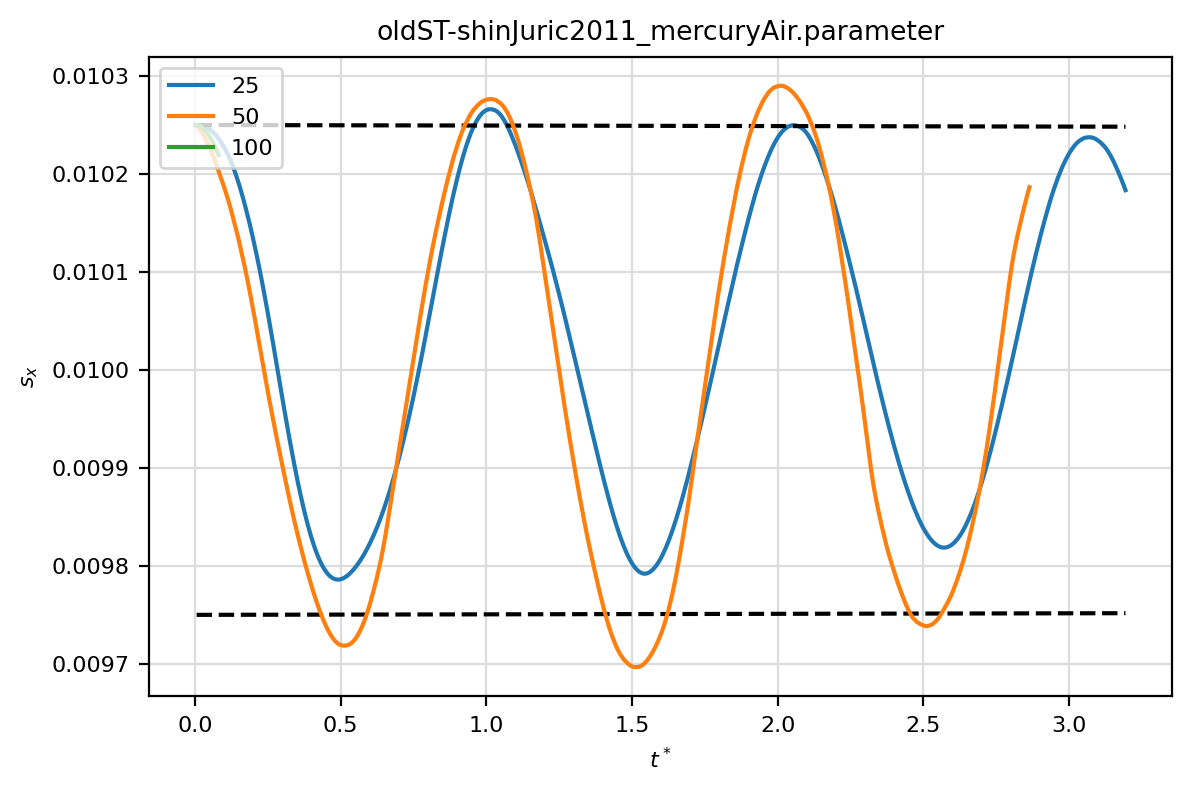

In [138]:
plot_shinJuric2011_mercuryAir("./",'oldST-')

## shinJuric2011_mercuryAir_rho1

In [1]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt

rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200

import os
if (not(os.path.exists('figures'))):
    os.mkdir('figures')

def plot_shinJuric2011_mercuryAir_ratio1(case_path, prefix):
    
    study_name_shinJuric2011 = "shinJuric2011_mercuryAir_ratio1.parameter"
    case_0_name_shinJuric2011 = case_path + prefix + study_name_shinJuric2011 + "_00000_template_copy_block"
    df_shinJuric2011 = datglom.data_agglomerator(study_name_shinJuric2011,case_0_name_shinJuric2011,"oscillatingDropletResults.csv").study_dataframe()
    df = df_shinJuric2011.reset_index()
    #nu_d=list(set(df['nu_droplet']))
    resolutions=list(set(df['resolution']))
    
    R_0=0.01
    n=2
    sigma=0.4855
    rho_d = 1.0
    rho_a = 1.0
    nu = 1.133e-07
    a_0 = 0.00025
    w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a)*R_0**3))
    print(w_n)
    print(6*np.pi / w_n)

#    fig, ax = plt.subplots(1,2)
    
    gamma = (n-1)*(2*n+1)*nu/(R_0**2)
#    df_nu = df.loc[df['nu_droplet']==nu]
    max_t = max(df['time'])
    
    #plt.figure(figsize = (4,5))
            
    for resolution in resolutions:
        s_x = df.loc[(df['resolution']==resolution)]
        plt.plot(s_x['time']* w_n / 20*np.pi,s_x['semi-axes-x'],label = "%s"%resolution)
        plt.legend(loc='upper left')
        if max(s_x['time']) == max_t:
            plt.plot(s_x['time']* w_n / 20*np.pi, R_0 + a_0*np.exp(-gamma*s_x['time']),'k--')
            plt.plot(s_x['time']* w_n / 20*np.pi, R_0 - a_0*np.exp(-gamma*s_x['time']),'k--')
                
    plt.xlabel("$t^*$")
    plt.ylabel('$s_x$')
    plt.xlim(0,10.2)
#    plt.ylim(0.0097,0.0103)
#    plt.xticks([0,0.5,1,1.5,2],['0','1/2','1','3/2','2'])
    #plt.xticklabels()
    plt.title(prefix+"shinJuric2011_mercuryAir_rho1.parameter")
    plt.grid(c='gainsboro')
               
    #plt.gca().set_aspect(0.5)
    
    #fig.suptitle(r'%s'%case_path,y=1.02,fontsize=12)
    plt.tight_layout()      
    #fig.subplots_adjust(top=0.88)
    
#-------------------------------------unsave/save figures------------------------------------------
#     split_n= case_path.split('/')
#     fig_name= "Osci_shinJuric2011"+"_"+split_n[0]+'_'+split_n[1]+'_'+split_n[2]
#     figures_path = os.environ['LENT_DENSITY_RATIO']
#     plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#     plt.savefig('figures/%s.pdf'% fig_name)
#    axes=plt.gca()
#    axes.set_aspect('equal')
    
    plt.show()

1526.5647709809102
0.01234769482426008


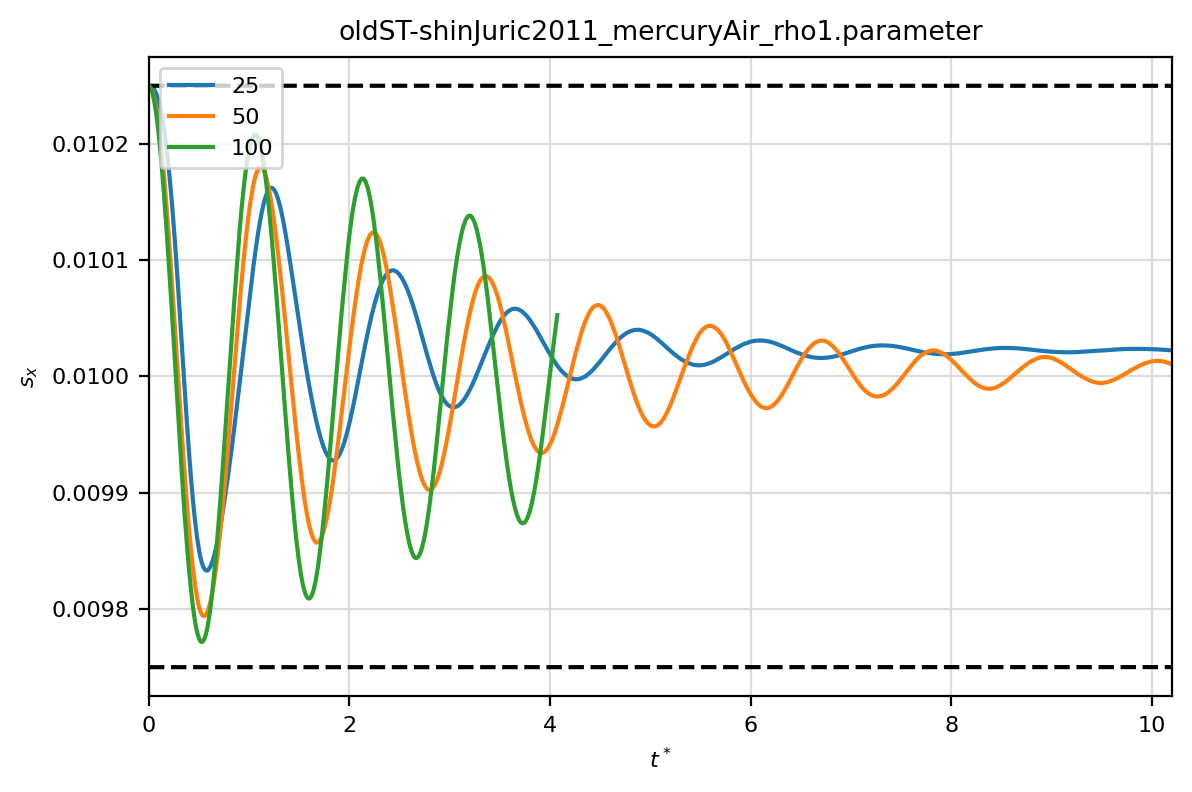

In [2]:
plot_shinJuric2011_mercuryAir_ratio1("./",'oldST-')

## shinJuric2011_waterAir

In [1]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt

rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200

import os
if (not(os.path.exists('figures'))):
    os.mkdir('figures')

def plot_shinJuric2011_waterAir(case_path, prefix):
    
    study_name_shinJuric2011 = "shinJuric2011_waterAir.parameter"
    case_0_name_shinJuric2011 = case_path + prefix + study_name_shinJuric2011 + "_00000_template_copy_block"
    df_shinJuric2011 = datglom.data_agglomerator(study_name_shinJuric2011,case_0_name_shinJuric2011,"oscillatingDropletResults.csv").study_dataframe()
    df = df_shinJuric2011.reset_index()
    #nu_d=list(set(df['nu_droplet']))
    resolutions=list(set(df['resolution']))
    
    R_0=0.01
    n=2
    sigma=0.07213
    rho_d = 997.05
    rho_a = 1.1839
    nu = 8.926e-07
    a_0 = 0.00025
    w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a)*R_0**3))
    print(w_n)
    print(6*np.pi / w_n)

#    fig, ax = plt.subplots(1,2)
    
    gamma = (n-1)*(2*n+1)*nu/(R_0**2)
#    df_nu = df.loc[df['nu_droplet']==nu]
    max_t = max(df['time'])
    
    #plt.figure(figsize = (4,5))
            
    for resolution in resolutions:
        s_x = df.loc[(df['resolution']==resolution)]
        plt.plot(s_x['time']* w_n / 20*np.pi,s_x['semi-axes-x'],label = "%s"%resolution)
        plt.legend(loc='upper left')
        if max(s_x['time']) == max_t:
            plt.plot(s_x['time']* w_n / 20*np.pi, R_0 + a_0*np.exp(-gamma*s_x['time']),'k--')
            plt.plot(s_x['time']* w_n / 20*np.pi, R_0 - a_0*np.exp(-gamma*s_x['time']),'k--')
                
    plt.xlabel("$t^*$")
    plt.ylabel('$s_x$')
#    plt.xlim(0,2.2)
#    plt.ylim(0.0097,0.0103)
#    plt.xticks([0,0.5,1,1.5,2],['0','1/2','1','3/2','2'])
    #plt.xticklabels()
    plt.title(prefix+"shinJuric2011_waterAir.parameter")
    plt.grid(c='gainsboro')
               
    #plt.gca().set_aspect(0.5)
    
    #fig.suptitle(r'%s'%case_path,y=1.02,fontsize=12)
    plt.tight_layout()      
    #fig.subplots_adjust(top=0.88)
    
#-------------------------------------unsave/save figures------------------------------------------
#     split_n= case_path.split('/')
#     fig_name= "Osci_shinJuric2011"+"_"+split_n[0]+'_'+split_n[1]+'_'+split_n[2]
#     figures_path = os.environ['LENT_DENSITY_RATIO']
#     plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#     plt.savefig('figures/%s.pdf'% fig_name)
#    axes=plt.gca()
#    axes.set_aspect('equal')
    
    plt.show()

24.04765122548619
0.7838418706589363


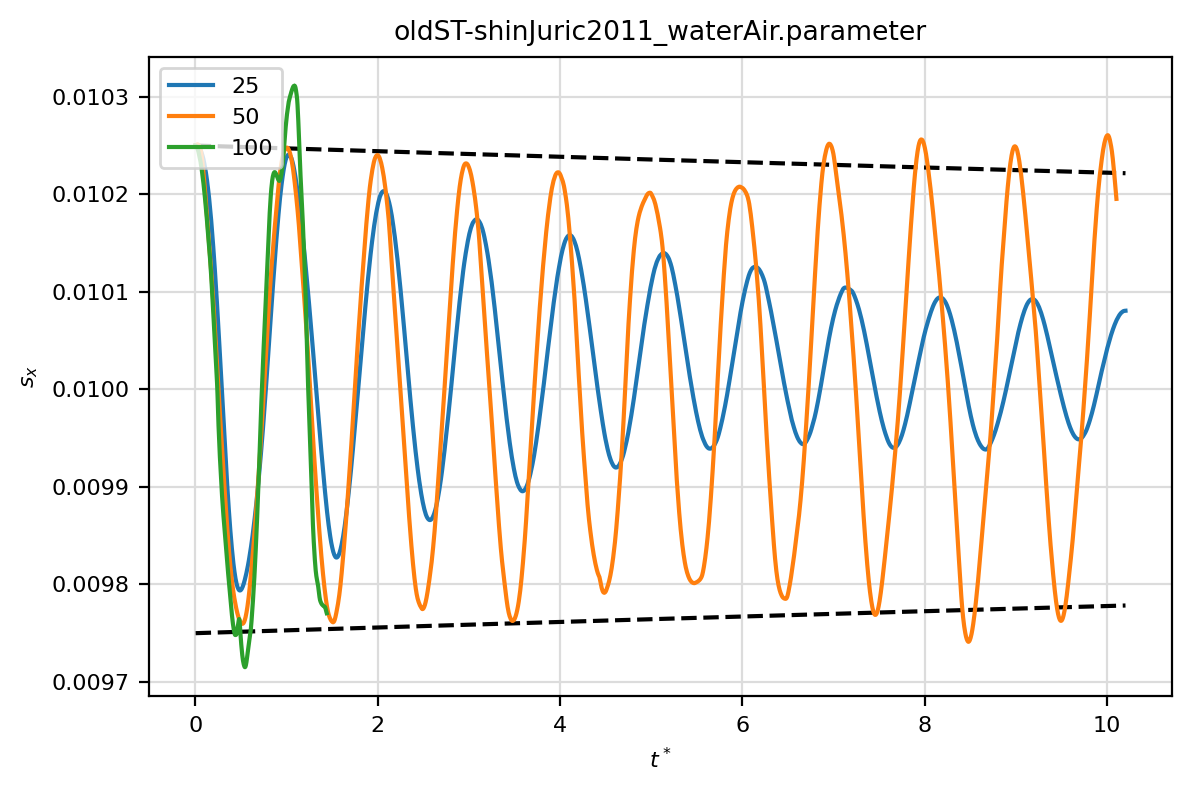

In [2]:
#rcParams["figure.dpi"] = 200
#rcParams["font.size"] = 8
plot_shinJuric2011_waterAir("./","oldST-")

In [146]:
R_0=0.01
n=2
sigma=0.4855
rho_d = 1.0 #1.35336e+04
rho_a = 1.0 #1.09
a_0 = 0.0025
w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a)*R_0**3))
print(w_n)
print(20*np.pi / w_n)

1526.5647709809102
0.0411589827475336


In [143]:
R_0=0.01
n=2
sigma=0.07213
rho_d = 997.05 #1.35336e+04
rho_a = 1.1839 
a_0 = 0.0025
w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a)*R_0**3))
print(w_n)
print(20*np.pi / w_n)

24.04765122548619
2.6128062355297876
62.389185449324174
1.0070952620920375


In [23]:
R_0=1
n=2
sigma=10
rho_d = 100
rho_a = 0.1
a_0 = 0.025
w_n = np.sqrt(n*(n+1)*(n-1)*(n+2)*sigma/(((n+1)*rho_d + n*rho_a)*R_0**3))
print(w_n)
print(2*np.pi*3 / w_n)

0.8941291975913453
21.08146783744087


In [58]:
study_name_shinJuric2011 = "shinJuric2011.parameter"
case_0_name_shinJuric2011 = "rhoLent_shinJuric2011/rhoRatio_1000/" + study_name_shinJuric2011 + "_00000_template_copy_block"
df_shinJuric2011 = datglom.data_agglomerator(study_name_shinJuric2011,case_0_name_shinJuric2011,"oscillatingDropletResults.csv").study_dataframe()
df = df_shinJuric2011.reset_index()
df

,resolution,nu_droplet,step,total_energy,surface_energy,kinetic_energy_total,time,kinetic_energy_droplet,semi-axes-x,semi-axes-y,semi-axes-z,centre-of-mass-x,centre-of-mass-y,centre-of-mass-z
0,25,0.050,0,125.531,125.531,0.000044,0.040390,0.000043,1.02500,0.987493,0.987494,2.00001,1.99999,2.00003
1,25,0.050,1,125.531,125.531,0.000165,0.080781,0.000164,1.02499,0.987518,0.987519,2.00001,1.99999,2.00003
2,25,0.050,2,125.530,125.530,0.000354,0.121171,0.000352,1.02496,0.987569,0.987570,2.00001,1.99999,2.00003
3,25,0.050,3,125.530,125.529,0.000602,0.161561,0.000598,1.02493,0.987645,0.987647,2.00001,1.99999,2.00003
4,25,0.050,4,125.529,125.528,0.000900,0.201952,0.000895,1.02487,0.987746,0.987748,2.00001,1.99999,2.00003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,100,0.005,1322,125.638,125.636,0.002016,6.679550,0.002012,1.01978,0.990046,0.990050,1.99997,1.99978,1.99986
3920,100,0.005,1323,125.638,125.636,0.001959,6.684590,0.001955,1.01981,0.990032,0.990036,1.99997,1.99978,1.99986
3921,100,0.005,1324,125.638,125.636,0.001903,6.689640,0.001899,1.01984,0.990017,0.990021,1.99997,1.99978,1.99986
3922,100,0.005,1325,125.638,125.636,0.001847,6.694690,0.001844,1.01987,0.990003,0.990007,1.99997,1.99978,1.99986


In [32]:
study_name_shinJuric2011 = "shinJuric2011_mercuryAir.parameter"
case_0_name_shinJuric2011 = "./" + study_name_shinJuric2011 + "_00000_template_copy_hexrefined"
df_shinJuric2011 = datglom.data_agglomerator(study_name_shinJuric2011,case_0_name_shinJuric2011,"oscillatingDropletResults.csv").study_dataframe()
df = df_shinJuric2011.reset_index()
df
#nu_d=list(set(df['nu_droplet']))
#resolutions=list(set(df['resolution']))

,resolution,step,total_energy,surface_energy,kinetic_energy_total,time,kinetic_energy_droplet,semi-axes-x,semi-axes-y,semi-axes-z,centre-of-mass-x,centre-of-mass-y,centre-of-mass-z
0,25,0,0.000609,0.000609,2.395660e-10,0.002132,2.391700e-10,0.010250,0.009875,0.009875,0.02,0.02,0.02
1,25,1,0.000609,0.000609,9.240080e-10,0.004263,9.229030e-10,0.010250,0.009875,0.009875,0.02,0.02,0.02
2,25,2,0.000609,0.000609,2.035730e-09,0.006395,2.033870e-09,0.010250,0.009876,0.009876,0.02,0.02,0.02
3,25,3,0.000609,0.000609,3.559090e-09,0.008526,3.556210e-09,0.010249,0.009876,0.009876,0.02,0.02,0.02
4,25,4,0.000609,0.000609,5.440980e-09,0.010658,5.436980e-09,0.010249,0.009877,0.009878,0.02,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,50,35,0.000610,0.000610,3.165050e-08,0.027130,3.164280e-08,0.010208,0.009890,0.009890,0.02,0.02,0.02
388,50,36,0.000610,0.000610,3.336340e-08,0.027883,3.335530e-08,0.010207,0.009891,0.009891,0.02,0.02,0.02
389,50,37,0.000610,0.000610,3.497580e-08,0.028637,3.496740e-08,0.010205,0.009892,0.009892,0.02,0.02,0.02
390,50,38,0.000610,0.000610,3.663260e-08,0.029391,3.662380e-08,0.010203,0.009893,0.009893,0.02,0.02,0.02
